# <center>Построение пуассоновской регрессии

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Чтение и подготовка данных

Рассмотрим данные о количестве велосипедистов. Количество велосипедистов зависит от погодных условий в рассматриваемый день: чем хуже погода, тем меньше желающих. В качестве признаков возьмем:
- максимальную температуру в рассматриваемый день (F);
- минимальную температуру в рассматриваемый день (F);
- количество осадков.

In [4]:
data = pd.read_csv('data/nyc_bicyclist_counts.csv', index_col=['Date'], parse_dates=True)

In [5]:
data.head()

,HIGH_T,LOW_T,PRECIP,BB_COUNT
Date,,,,
2017-04-01,46.0,37.0,0.00,606
2017-04-02,62.1,41.0,0.00,2021
2017-04-03,63.0,50.0,0.03,2470
2017-04-04,51.1,46.0,1.18,723
2017-04-05,63.0,46.0,0.00,2807


Целевая переменная &ndash; `'BB_COUNT'` &ndash; содержит только целые положительные числа, что должно быть учтено при выборе предсказательной модели.

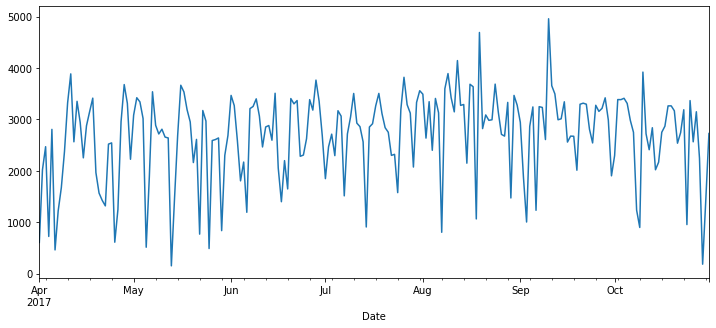

In [6]:
data['BB_COUNT'].plot(figsize=(12,5))
plt.show()

Кроме указанных факторов, количество велосипедистов может зависеть от дня недели: в выходные количество желающих больше, нежели в будни. Также может оказаться важным месяц. Добавим столбцы, содержащие информацию о том, на какой день недели и на какой месяц приходится наблюдение:

In [7]:
data['DAY_OF_WEEK'] = data.index.dayofweek
data['MONTH'] = data.index.month

Данные переменные являются категориальными.

<div class="alert alert-info">

<h3> Задание 1</h3>
<p></p>
<ul>1. Определите функцию, которая принимает на вход исходные данные $(X,y)$ и параметры модели $\theta$. Данная функция должна возвращать среднеквадратичную ошибку модели.</ul>
    
<ul>2. Определите аналогичную функцию, которая возвращает значение функционала качества пуассоновской регрессии.</ul>  
    
<ul>3. Обучите обе модели с помощью функции minimize из SciPy. Сравните качество аппроксимации моделей. Метрикой качества выберите среднюю абсолютную ошибку.</ul>    
 
<ul>4. Отобразите на графике исходный ряд и результаты аппроксимации линейной и пуассоновской регрессиями.</ul>
<p></p>   

<p></p>
</div>

In [8]:
data["FREE"]=1

In [9]:
from scipy.optimize import minimize

In [10]:
X = data.drop('BB_COUNT', axis=1)
y = data['BB_COUNT']

In [11]:
def mae(X, y, theta):
    return np.mean(np.abs(y - np.dot(X, theta)))

In [12]:
opfunc = lambda theta: mae(X, y, theta)

optimization = minimize(opfunc, (0,0,0,0,0,0))

print(optimization)
linear_theta = optimization.x

      fun: 434.96888038367257
 hess_inv: array([[ 64.97666991, -69.30803095,  55.89860769, -51.94469232,
         -7.36430245,  11.77645236],
       [-69.30803095,  74.14991076, -56.69122951,  53.2635421 ,
          7.25211331, -12.86467275],
       [ 55.89860769, -56.69122951,  98.62364454, -76.38509794,
        -13.17009322,   3.58517359],
       [-51.94469232,  53.2635421 , -76.38509794,  63.73972212,
         11.17945039,  -5.82705586],
       [ -7.36430245,   7.25211331, -13.17009322,  11.17945039,
          2.71460404,  -0.83022352],
       [ 11.77645236, -12.86467275,   3.58517359,  -5.82705586,
         -0.83022352,   4.06679695]])
      jac: array([-0.89533234, -0.77943802, -0.00672913, -0.04673004, -0.06542206,
       -0.03738403])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1202
      nit: 70
     njev: 171
   status: 2
  success: False
        x: array([   67.40904751,   -40.46316635, -1141.08508839,   -79.60349911,
          65.070

In [13]:
def poiss_mae(X, y, theta):
    return np.mean((np.exp(X @ theta) - y*(X @ theta)))

In [14]:
poiss_mae(X,y,np.array([1,1,1,1,1,1]))

1.7380865639557653e+77

In [17]:
opfunc2 = lambda theta: poiss_mae(X, y, theta)

optimization = minimize(opfunc, (0,0,1,0,0,0))

print(optimization)
poiss_theta = optimization.x

      fun: 434.9788255027669
 hess_inv: array([[ 1.05635646e+01, -1.12422579e+01, -2.83756325e+01,
        -6.61846915e-01, -2.57755733e+00,  4.79959158e+00],
       [-1.12422579e+01,  1.21715742e+01,  2.48807828e+01,
         2.07092839e-01,  1.64746880e+00, -4.68794553e+00],
       [-2.83756325e+01,  2.48807828e+01,  4.25163305e+02,
         2.27725436e+00,  3.42702335e+01, -4.04563412e+01],
       [-6.61846915e-01,  2.07092839e-01,  2.27725436e+00,
         6.30811624e+00,  1.22870801e+00, -7.59825165e-02],
       [-2.57755733e+00,  1.64746880e+00,  3.42702335e+01,
         1.22870801e+00,  7.27815989e+00, -3.56017942e+00],
       [ 4.79959158e+00, -4.68794553e+00, -4.04563412e+01,
        -7.59825165e-02, -3.56017942e+00,  5.65434542e+00]])
      jac: array([-0.68037415, -0.64766312, -0.00738144, -0.04673004, -0.08411407,
       -0.03738403])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1142
      nit: 65
     njev: 162
   status: 2
  succes

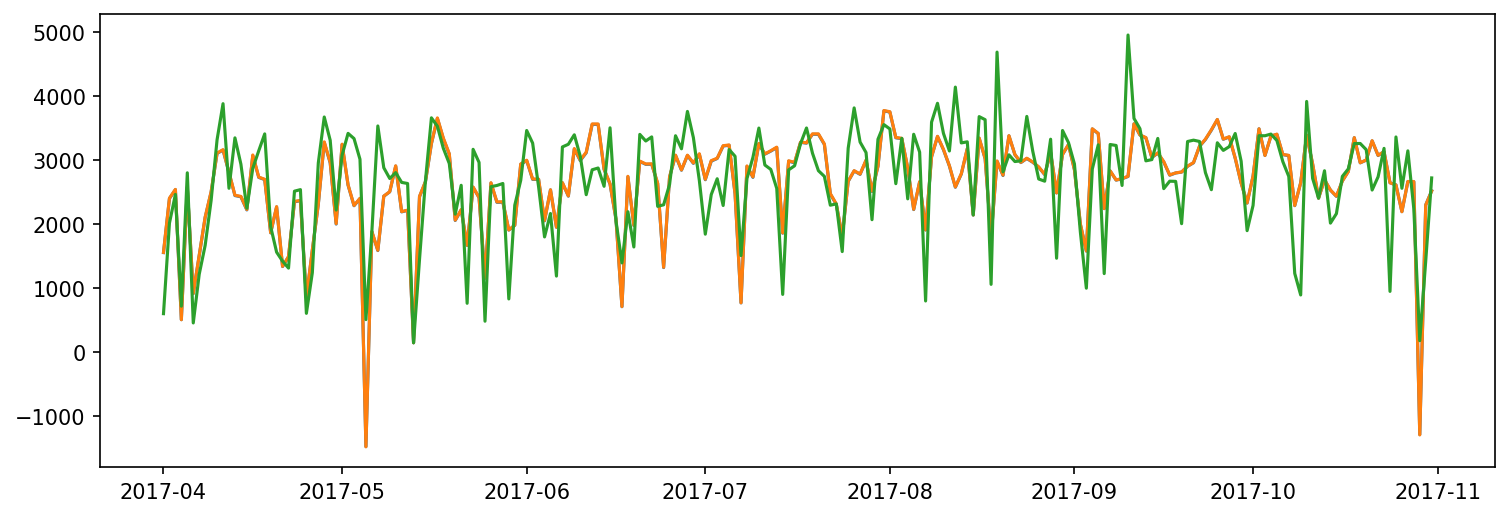

In [18]:
plt.figure(figsize=(12,4), dpi=150)
plt.plot(X @ linear_theta)
plt.plot(X @ poiss_theta)
plt.plot(y)
plt.show()

<div class="alert alert-info">

<h3> Задание 2</h3>
<p></p>
<ul>Линейные модели чувствительны к виду категориальных признаков. Преобразуйте категориальные признаки с помощью One Hot Encoding и повторите шаги 3-4 из задания 1. Как изменилось качество моделей?</ul>
<p></p>
</div>

<div class="alert alert-info">

<h3> Задание 3</h3>
<p></p>
<ul>Преобразуйте категориальные признаки с помощью Фурье-разложения и повторите шаги 3-4 из задания 1. Какого качества моделей удалось достичь?</ul>
<p></p>
</div>